In [1]:
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

import time
import math

# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns

In [2]:
#Collecting the number of different sectors of stocks available in the S&P 500
total_df = pd.read_csv('.\sp500_companies.csv')
companies = total_df['Symbol']

In [3]:
#Setting the path and the start and end dates to fetch the data
PATH = ".\SNP_500\\"
S_YEAR = 2023
S_MONTH = 7
S_DAY = 1
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR, S_MONTH, S_DAY)

E_YEAR = 2024
E_MONTH = 5
E_DAY = 1
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR, E_MONTH, E_DAY)

In [4]:
#Defining function to download the stock data in a given time
company_found = []
stocks_not_downloaded = []
def save_to_csv_from_yahoo(folder, ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    try:
        print("Get data for :", ticker)
        df = pdr.get_data_yahoo(ticker, start, end)['Adj Close']
        time.sleep(5)
        df.to_csv(folder + ticker + '.csv')
        company_found.append(ticker)
    except Exception as ex:
        #print(ex)
        stocks_not_downloaded.append(ticker)
        print("Couldn't get data for ", ticker)

In [36]:
#Downloading Data for all the companies possible in the time range in S&P 500
for x in total_df['Symbol']:
    save_to_csv_from_yahoo(PATH, x, S_YEAR, S_MONTH, S_DAY, E_YEAR, E_MONTH, E_DAY)

Get data for : MSFT
[*********************100%***********************]  1 of 1 completed
Get data for : AAPL
[*********************100%***********************]  1 of 1 completed
Get data for : NVDA
[*********************100%***********************]  1 of 1 completed
Get data for : GOOGL
[*********************100%***********************]  1 of 1 completed
Get data for : GOOG
[*********************100%***********************]  1 of 1 completed
Get data for : AMZN
[*********************100%***********************]  1 of 1 completed
Get data for : META
[*********************100%***********************]  1 of 1 completed
Get data for : BRK-B
[*********************100%***********************]  1 of 1 completed
Get data for : LLY
[*********************100%***********************]  1 of 1 completed
Get data for : AVGO
[*********************100%***********************]  1 of 1 completed
Get data for : JPM
[*********************100%***********************]  1 of 1 completed
Get data for : V
[***

[*********************100%***********************]  1 of 1 completed
Get data for : HES
[*********************100%***********************]  1 of 1 completed
Get data for : PCG
[*********************100%***********************]  1 of 1 completed
Get data for : EL
[*********************100%***********************]  1 of 1 completed
Get data for : OKE
[*********************100%***********************]  1 of 1 completed
Get data for : O
[*********************100%***********************]  1 of 1 completed
Get data for : DLR
[*********************100%***********************]  1 of 1 completed
Get data for : ADSK
[*********************100%***********************]  1 of 1 completed
Get data for : FTNT
[*********************100%***********************]  1 of 1 completed
Get data for : STZ
[*********************100%***********************]  1 of 1 completed
Get data for : JCI
[*********************100%***********************]  1 of 1 completed
Get data for : GWW
[*********************100%*******

[*********************100%***********************]  1 of 1 completed
Get data for : ROK
[*********************100%***********************]  1 of 1 completed
Get data for : EFX
[*********************100%***********************]  1 of 1 completed
Get data for : HPQ
[*********************100%***********************]  1 of 1 completed
Get data for : HIG
[*********************100%***********************]  1 of 1 completed
Get data for : ADM
[*********************100%***********************]  1 of 1 completed
Get data for : GLW
[*********************100%***********************]  1 of 1 completed
Get data for : CDW
[*********************100%***********************]  1 of 1 completed
Get data for : WAB
[*********************100%***********************]  1 of 1 completed
Get data for : EIX
[*********************100%***********************]  1 of 1 completed
Get data for : ANSS
[*********************100%***********************]  1 of 1 completed
Get data for : AVB
[*********************100%*****

[*********************100%***********************]  1 of 1 completed
Get data for : CINF
[*********************100%***********************]  1 of 1 completed
Get data for : RF
[*********************100%***********************]  1 of 1 completed
Get data for : DRI
[*********************100%***********************]  1 of 1 completed
Get data for : AVY
[*********************100%***********************]  1 of 1 completed
Get data for : EQT
[*********************100%***********************]  1 of 1 completed
Get data for : UAL
[*********************100%***********************]  1 of 1 completed
Get data for : BAX
[*********************100%***********************]  1 of 1 completed
Get data for : ATO
[*********************100%***********************]  1 of 1 completed
Get data for : DPZ
[*********************100%***********************]  1 of 1 completed
Get data for : LH
[*********************100%***********************]  1 of 1 completed
Get data for : ESS
[*********************100%*******

[*********************100%***********************]  1 of 1 completed
Get data for : BBWI
[*********************100%***********************]  1 of 1 completed
Get data for : BXP
[*********************100%***********************]  1 of 1 completed
Get data for : EPAM
[*********************100%***********************]  1 of 1 completed
Get data for : ALLE
[*********************100%***********************]  1 of 1 completed
Get data for : WYNN
[*********************100%***********************]  1 of 1 completed
Get data for : SOLV
[*********************100%***********************]  1 of 1 completed
Get data for : RL
[*********************100%***********************]  1 of 1 completed
Get data for : PAYC
[*********************100%***********************]  1 of 1 completed
Get data for : TFX
[*********************100%***********************]  1 of 1 completed
Get data for : FFIV
[*********************100%***********************]  1 of 1 completed
Get data for : HII
[*********************100%

In [5]:
#Function to get the stock data in csv form to a pd.DataFrame form
def get_stock_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col = 'Date', parse_dates = True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [6]:
#Function to add a new column "daily_return" to keep track of daily returns
def add_daily_returns(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col = 'Date', parse_dates = True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        df['daily_return'] = (df['Adj Close']/df['Adj Close'].shift(1)) - 1
        df.fillna(0)
        df.to_csv(PATH + ticker + ".csv")

In [7]:
stock_mu_var = [] #to store the relevant values, like company name, the normal mean, variance and the desirable price at the end of 1 year
T = 252 #number of days the market is open in 1 year (roughly)
for ticker in total_df['Symbol']:
    df = get_stock_df_from_csv(ticker)
    
    #the mean of the normal distribution E[X]
    df['Temp'] = np.log(df['Adj Close']/df['Adj Close'].shift(1)) #the logarithm of the ratio of prices of 2 consecutive days
    m = df['Temp'].sum()/df['Temp'].count() 
    
    #the variance of the notmal distribution E[(X - E[X])**2]
    df['Temp'] = np.power(df['Temp'].sub(m), 2)
    var = df['Temp'].sum()/(df['Adj Close'].count() - 1)
    X0 = df['Adj Close'].iloc[df['Adj Close'].count() - 1]
    
    stock_mu_var.append([ticker, math.log(X0) + m*T, var*T, math.log(X0*1.1)])

In [8]:
#finding the probability that the stock price is above our target profit margins
from scipy.stats import norm
stock_prob = []
i = 0;
for ticker, m, var, need in stock_mu_var:
    stock_prob.append([1 - norm.cdf(need, loc = m, scale = math.sqrt(var)), i])
    i = i+1
    
stock_prob = sorted(stock_prob, reverse = True)

In [9]:
#finding the top companies that have the highest probability of surpassing our target profit margins
companies_t10 = []
start = dt.datetime(2022, 4, 1)
end = dt.datetime(2022, 5, 1)
i = 0
for prob, ind in stock_prob:
    ticker = companies[ind]
    try:       #to check if the company is 2 years older or not
        print("Get data for :", ticker)
        df = pdr.get_data_yahoo(ticker, start, end)['Adj Close']
        time.sleep(5)
        
        if(df.size != 0):
            print(df.size)
            companies_t10.append(ticker)
    except Exception as ex:
        #print(ex)
        stocks_not_downloaded.append(ticker)
        print("Couldn't get data for ", ticker)
       
    i = i + 1    
    if(len(companies_t10) == 10):
        break

Get data for : VST
[*********************100%***********************]  1 of 1 completed
20
Get data for : NRG
[*********************100%***********************]  1 of 1 completed
20
Get data for : GE
[*********************100%***********************]  1 of 1 completed
20
Get data for : LDOS
[*********************100%***********************]  1 of 1 completed
20
Get data for : CEG
[*********************100%***********************]  1 of 1 completed
20
Get data for : TT
[*********************100%***********************]  1 of 1 completed
20
Get data for : FANG
[*********************100%***********************]  1 of 1 completed
20
Get data for : APH
[*********************100%***********************]  1 of 1 completed
20
Get data for : WRK
[*********************100%***********************]  1 of 1 completed
20
Get data for : ETN
[*********************100%***********************]  1 of 1 completed
20


In [10]:
#displaying the top comapnies
companies_t10 

['VST', 'NRG', 'GE', 'LDOS', 'CEG', 'TT', 'FANG', 'APH', 'WRK', 'ETN']

In [11]:
#to make one dataframe containing the statistics of Adj Close prices of the top companies found
not_found = []
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    mult_df = pd.DataFrame()
    for x in tickers:
        try:
            df = pd.read_csv(PATH + x + '.csv', index_col = 'Date', parse_dates = True)
        except FileNotFoundError:
            not_found.append(company)
            print('FileNotFoundError')
            continue;
        else:
            mult_df[x] = df.loc[(df.index >= sdate) & (df.index <= edate)][col_name]
    return mult_df

In [12]:
top_stocks_all_industries = merge_df_by_column_name('Adj Close', S_DATE_DATETIME, E_DATE_DATETIME, *companies_t10)
top_stocks_all_industries

,VST,NRG,GE,LDOS,CEG,TT,FANG,APH,WRK,ETN
Date,,,,,,,,,,
2023-07-03,25.694530,36.428875,86.037918,87.520782,90.965714,189.299576,125.053558,83.519714,28.461912,197.827286
2023-07-05,26.433165,37.135761,86.331909,87.748444,91.501976,187.883820,123.774132,83.301178,27.578245,196.121445
2023-07-06,26.541494,36.603180,85.314842,87.540581,90.369873,187.923401,120.523392,83.142235,27.626799,194.987503
2023-07-07,26.295284,36.913044,86.029976,87.144653,90.697594,187.309586,125.480042,83.062775,28.160885,195.687592
2023-07-10,26.058922,36.632233,87.907120,87.134758,92.951866,191.675766,127.081711,84.314377,27.937540,200.223312
...,...,...,...,...,...,...,...,...,...,...
2024-04-24,70.459999,72.209396,159.190002,128.899994,186.160004,296.489990,203.226135,116.309998,47.201408,317.839508
2024-04-25,72.480003,72.458015,161.259995,129.880005,188.009995,299.369995,205.067886,119.010002,46.535343,316.154572
2024-04-26,72.699997,72.408287,162.350006,130.360001,188.369995,304.529999,205.721405,120.489998,46.972759,323.333069


<AxesSubplot:xlabel='Date'>

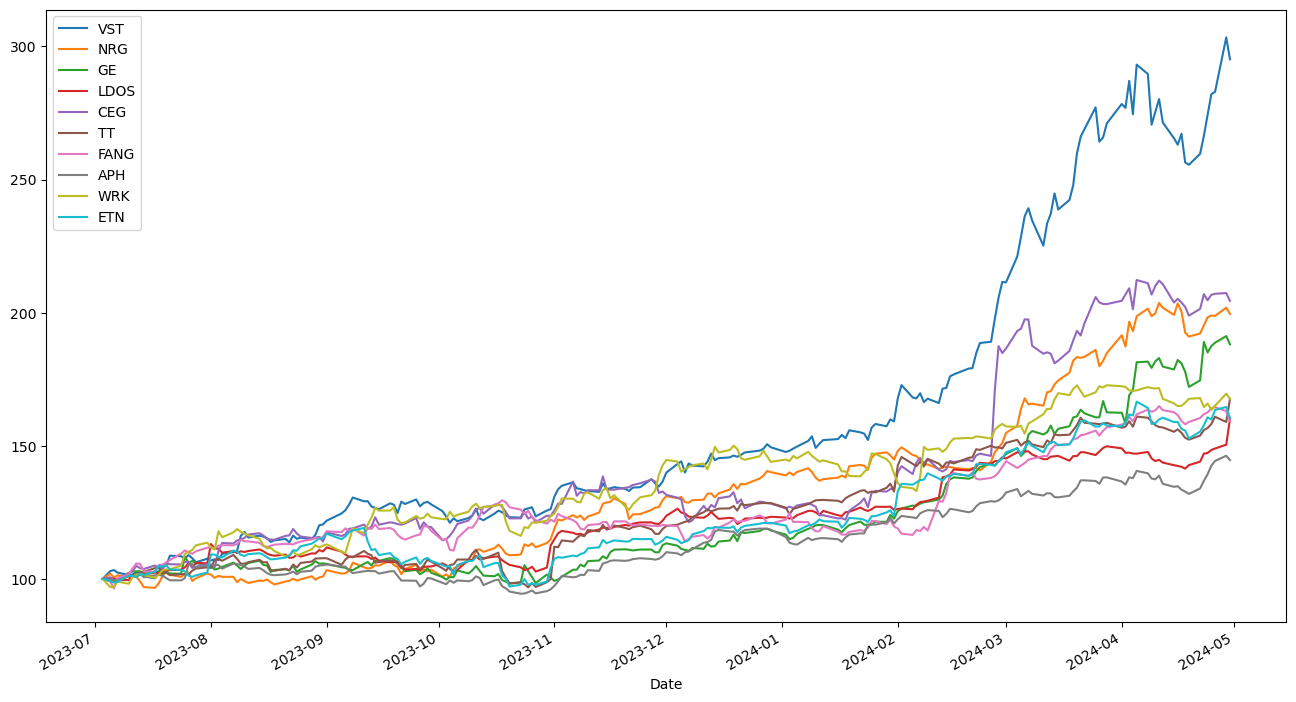

In [13]:
#plotting the price change of each of the top stocks, with $100 invested in them for uniformity  
(top_stocks_all_industries/top_stocks_all_industries.iloc[0]*100).plot(figsize = (16, 9))

In [14]:
#Making a list of net returns of each stock indexed by ticker
returns = np.log(top_stocks_all_industries/top_stocks_all_industries.shift(1))
mean_return = returns.mean()*252
mean_return

VST     1.311306
NRG     0.836648
GE      0.765325
LDOS    0.571042
CEG     0.866179
TT      0.625933
FANG    0.563788
APH     0.446822
WRK     0.625052
ETN     0.572438
dtype: float64

In [15]:
returns.corr()

,VST,NRG,GE,LDOS,CEG,TT,FANG,APH,WRK,ETN
VST,1.000000,0.559243,0.258634,0.168479,0.471989,0.249623,0.122520,0.300681,0.044967,0.340161
NRG,0.559243,1.000000,0.327873,0.173011,0.449188,0.270069,0.240820,0.267228,0.139022,0.348039
GE,0.258634,0.327873,1.000000,0.104241,0.299322,0.303764,0.141066,0.478579,0.091855,0.433586
LDOS,0.168479,0.173011,0.104241,1.000000,0.089536,0.253980,0.154247,0.200899,0.072805,0.346460
CEG,0.471989,0.449188,0.299322,0.089536,1.000000,0.240790,0.152356,0.235415,0.133187,0.334170
TT,0.249623,0.270069,0.303764,0.253980,0.240790,1.000000,-0.092204,0.481867,0.054361,0.578825
FANG,0.122520,0.240820,0.141066,0.154247,0.152356,-0.092204,1.000000,0.155374,0.283811,0.088472
APH,0.300681,0.267228,0.478579,0.200899,0.235415,0.481867,0.155374,1.000000,0.229734,0.528567
WRK,0.044967,0.139022,0.091855,0.072805,0.133187,0.054361,0.283811,0.229734,1.000000,0.079187
ETN,0.340161,0.348039,0.433586,0.346460,0.334170,0.578825,0.088472,0.528567,0.079187,1.000000


In [16]:
p_ret = []   #stores returns of each combination of investment 
p_vol = []   #stores volatility measure of each combination of investment
p_SR = []    #stores the Sharpe Ratio of each combination of investment
p_wt = []    #stores list of each combination of percentage of investment in each stock

#making 10000 random combinations of percentage of total investment invested in each stock 
for x in range (10000):
    p_weights = np.random.random(10)
    p_weights /= np.sum(p_weights)
    
    ret1 = np.sum(p_weights * returns.mean()) * 252

    vol1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))

    p_ret.append(ret1)
    p_vol.append(vol1)
    
    #finding the sharpe ratio considering the risk free rate to be the risk free rate if 10yr bonds (4.42% in the US market)  
    SR1 = (ret1 - 0.0442)/vol1
    p_SR.append(SR1)
    
    p_wt.append(p_weights)

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.68309364, 0.78243448, 0.74023983, ..., 0.67809818, 0.64565915,
        0.76325801]),
 array([0.13952091, 0.15903104, 0.15596003, ..., 0.14616902, 0.13171154,
        0.18798699]),
 array([4.57919628, 4.6420778 , 4.46293721, ..., 4.33674776, 4.56648786,
        3.82504143]),
 array([[0.07209473, 0.10688097, 0.14138599, ..., 0.15291515, 0.09638875,
         0.12919458],
        [0.15839997, 0.06767746, 0.18355926, ..., 0.0326404 , 0.04007571,
         0.10981183],
        [0.1588585 , 0.06227955, 0.00488457, ..., 0.14434084, 0.07281654,
         0.1458356 ],
        ...,
        [0.0352791 , 0.0182059 , 0.10730261, ..., 0.08964834, 0.00818684,
         0.00137535],
        [0.06370377, 0.12322046, 0.05134084, ..., 0.15759001, 0.07339516,
         0.13191388],
        [0.06920086, 0.12615022, 0.1412969 , ..., 0.04705132, 0.01901309,
         0.21523361]]))

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

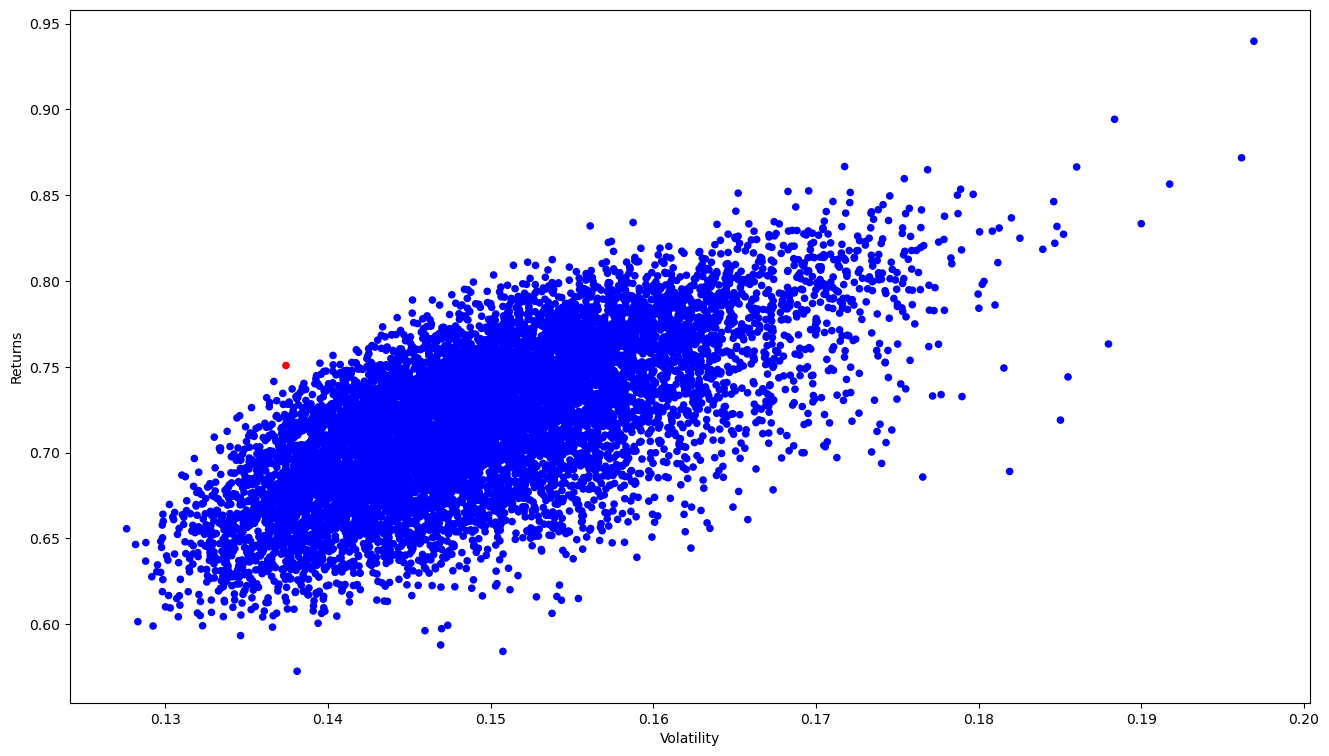

In [17]:
#Plotting the efficient frontier, the red point denotes the point with the highest Sharpe ratio
SR_idx = np.argmax(p_SR)
p_retf = []
p_volf = []
colors = []
for idx in range(len(p_ret)):
    if(idx == SR_idx):
        continue
    p_retf.append(p_ret[idx])
    p_volf.append(p_vol[idx])
    colors.append('blue')
p_retf.append(p_ret[SR_idx])
p_volf.append(p_vol[SR_idx])
colors.append('red')
ports = pd.DataFrame({'Returns': p_retf, 'Volatility': p_volf})
ports.plot.scatter(x='Volatility', y='Returns', c=colors, figsize = (16, 9))

In [18]:
#finding the maximum Sharpe ratio among all the combinations
i = 0
investment = {}
for i in range (10):
    #printing the sector, stock, and investment percentage
    print("Stock : {} -> {:2.2%}".format(companies_t10[i], (p_wt[SR_idx][i])))
    investment[companies_t10[i]] = (p_wt[SR_idx][i])
#printing volatility and returns of that combination
print('Volatility : ', p_vol[SR_idx])
print('Returns : ',p_ret[SR_idx])

Stock : VST -> 15.96%
Stock : NRG -> 12.22%
Stock : GE -> 6.96%
Stock : LDOS -> 19.86%
Stock : CEG -> 1.87%
Stock : TT -> 11.86%
Stock : FANG -> 13.88%
Stock : APH -> 2.49%
Stock : WRK -> 14.11%
Stock : ETN -> 0.78%
Volatility :  0.13741461394071328
Returns :  0.7507336154589691


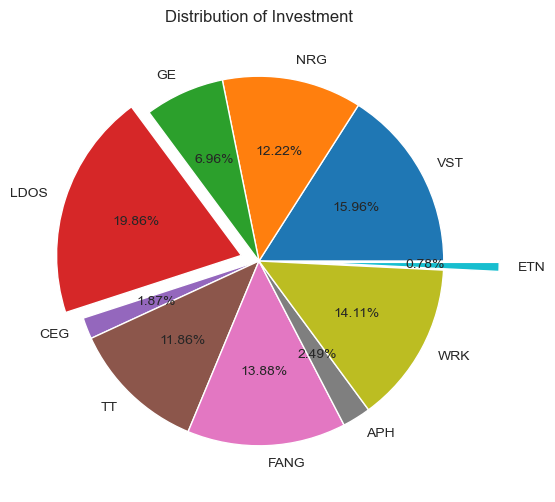

In [45]:
SR_max = np.argmax(p_wt[SR_idx])
SR_min = np.argmin(p_wt[SR_idx])
explode = []
for i in range(len(p_wt[SR_idx])):
    if(i == SR_max):
        explode.append(0.1)
        continue
    if(i == SR_min):
        explode.append(0.3)
        continue
    explode.append(0)
sns.set_style("darkgrid")
plt.pie(p_wt[SR_idx], labels=companies_t10, explode = explode, autopct='%2.2f%%')

plt.title("Distribution of Investment")
plt.show()

In [19]:
#creating a dictionary of number of stocks bought
stocks_bought = {}
for x in companies_t10:
    """
    the total investment here is adjusted such that we can buy atleast one stock for most of our 
    portfolio according to our investment plan. 50k is found to be such an amount.
    
    """
    print('{} -> {}'.format(x, round((investment[x]*50000)/top_stocks_all_industries[x].iloc[-1])))
    stocks_bought[x] = round((investment[x]*50000)/top_stocks_all_industries[x].iloc[-1])


VST -> 105
NRG -> 84
GE -> 22
LDOS -> 71
CEG -> 5
TT -> 19
FANG -> 35
APH -> 10
WRK -> 148
ETN -> 1


In [20]:
#finding the actual total cost after the rounding off
total_cost = 0
for x in companies_t10:
    total_cost += stocks_bought[x]*top_stocks_all_industries[x].iloc[-1]
total_cost

50094.218658447266

In [21]:
#Getting the data for S&P 500 index
save_to_csv_from_yahoo(PATH, "^GSPC", S_YEAR, S_MONTH, S_DAY, E_YEAR, E_MONTH, E_DAY)

Get data for : ^GSPC
[*********************100%***********************]  1 of 1 completed


In [22]:
#adding daily returns to the S&P 500 data
add_daily_returns("^GSPC")

In [23]:
#returning the value of a portfolio on a particular date
def return_portfolio_value_by_date(date, shares, tickers):
    port_prices = merge_df_by_column_name('Adj Close', date, date, *tickers)
    port_prices = port_prices.values.tolist()
    port_prices = sum(port_prices, [])
    
    cost_of_components = []
    for ticker, price in zip(tickers, port_prices):
        if(math.isnan(price) == False):
            cost_of_components.append(shares[ticker]*price)
    
    return sum(cost_of_components)

In [24]:
#returns the starting price of our portfolio in the time period
s_price = return_portfolio_value_by_date(dt.datetime(2023,7,3), stocks_bought, companies_t10)
#returns the last price of our portfolio in the time period
e_price = return_portfolio_value_by_date(dt.datetime(2024,4,30), stocks_bought, companies_t10)

In [25]:
#getting the dataframe of S&P 500
snp_df = get_stock_df_from_csv("^GSPC")
snp_df['S&P'] = snp_df['Adj Close']

In [26]:
#returns the starting price of S&P 500 in the time period
s_price_snp = snp_df['Adj Close'].loc[snp_df.index == dt.datetime(2023,7,3)].item()
#returns the last price of S&P 500 in the time period
e_price_snp = snp_df['Adj Close'].loc[snp_df.index == dt.datetime(2024,4,30)].item()

In [27]:
#comparison between S&P 500 and portfolio returns on investment
portfolio_roi = (e_price - s_price)/s_price
snp_roi = (e_price_snp - s_price_snp)/s_price_snp

print('Portfolio ROI : {:2.2%}'.format(portfolio_roi))
print('Market ROI : {:2.2%}'.format(snp_roi))

Portfolio ROI : 81.91%
Market ROI : 13.02%


In [28]:
#this fetches the daily_return of total portfolio
def get_portfolio_daily_return(sdate, edate, shares, tickers):
    mult_df = merge_df_by_column_name('Adj Close', sdate, edate, *tickers)
    num_cols = len(mult_df.columns)
    i=0
    while i < num_cols:
        mult_df[tickers[i]] = mult_df[tickers[i]].apply(lambda x:x * shares[tickers[i]])
        i += 1
    mult_df['Portfolio Total'] = mult_df.iloc[:, 0:num_cols].sum(axis=1)
    mult_df['daily_return'] = (mult_df['Portfolio Total']/mult_df['Portfolio Total'].shift(1)) - 1
    return mult_df

In [29]:
#storing the data of daily_return in a dataframe
total_portfolio_df = get_portfolio_daily_return(dt.datetime(2023,7,1), dt.datetime(2024,5,1), stocks_bought, companies_t10)
total_portfolio_df

,VST,NRG,GE,LDOS,CEG,TT,FANG,APH,WRK,ETN,Portfolio Total,daily_return
Date,,,,,,,,,,,,
2023-07-03,2697.925701,3060.025497,1892.834198,6213.975555,454.828568,3596.691940,4376.874542,835.197144,4212.362999,197.827286,27538.543430,NaN
2023-07-05,2775.482283,3119.403946,1899.302002,6230.139496,457.509880,3569.792572,4332.094612,833.011780,4081.580284,196.121445,27494.438299,-0.001602
2023-07-06,2786.856909,3074.667114,1876.926529,6215.381233,451.849365,3570.544617,4218.318710,831.422348,4088.766197,194.987503,27309.720526,-0.006718
2023-07-07,2761.004848,3100.695694,1892.659470,6187.270386,453.487968,3558.882126,4391.801453,830.627747,4167.810959,195.687592,27539.928242,0.008430
2023-07-10,2736.186790,3077.107544,1933.956635,6186.567818,464.759331,3641.839554,4447.859879,843.143768,4134.755928,200.223312,27666.400558,0.004592
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,7398.299904,6065.589294,3502.180054,9151.899567,930.800018,5633.309814,7112.914734,1163.099976,6985.808441,317.839508,48261.741310,0.007798
2024-04-25,7610.400352,6086.473297,3547.719879,9221.480347,940.049973,5688.029907,7177.376022,1190.100021,6887.230789,316.154572,48665.015160,0.008356
2024-04-26,7633.499680,6082.296112,3571.700134,9255.560043,941.849976,5786.069977,7200.249176,1204.899979,6951.968369,323.333069,48951.426514,0.005885


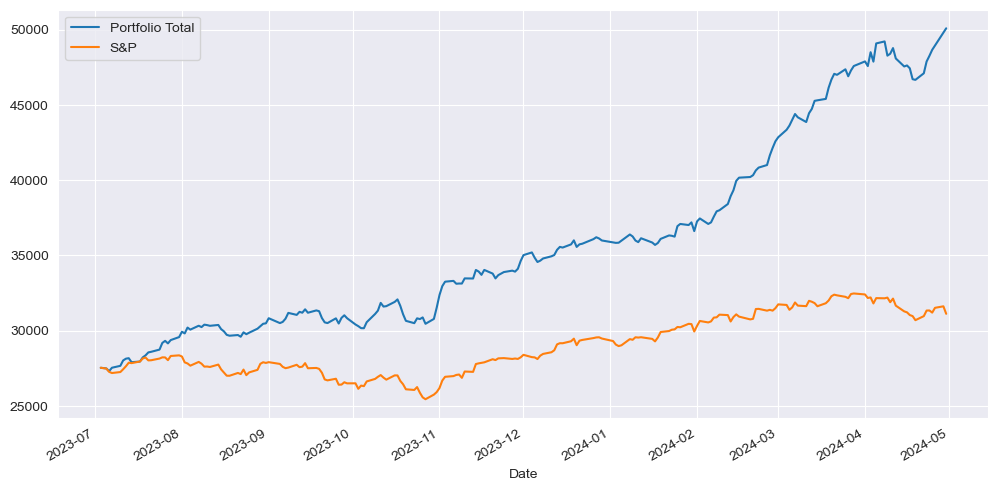

In [30]:
#plotting the total value of the portfolio with the S&P 500 data, considering same investment at the start of our data
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(12,6))
fig, ax = plt.subplots()
ax = total_portfolio_df['Portfolio Total'].plot(ax=ax)
ax = (snp_df['S&P']*(total_portfolio_df['Portfolio Total'][0])/snp_df['S&P'].iloc[0]).plot(ax=ax)
ax.legend()

In [31]:
#function finds the beta of the portfolio with respect to the market
def find_portfolio_beta(port_df, sdate, edate):
    mult_df = pd.DataFrame()
    port_mask = (port_df.index >= sdate) & (port_df.index <= edate)
    snp_df = pd.read_csv(PATH + '^GSPC.csv', index_col = 'Date', parse_dates = True)
    snp_mask = (snp_df.index >= sdate) & (snp_df.index <= edate)
    mult_df['GSPC'] = snp_df.loc[snp_mask]['daily_return']
    mult_df['Portfolio'] = port_df.loc[port_mask]['daily_return']
    
    cov = mult_df.cov() * 252
    cov_vs_market = cov.iloc[0,1]
    snp_var = mult_df['GSPC'].var()* 252
    return cov_vs_market/snp_var

In [32]:
#the beta of the portfolio with respect to the market
beta_portfolio = find_portfolio_beta(total_portfolio_df, dt.datetime(2023,7,1), dt.datetime(2024,5,1))
beta_portfolio

0.6852652383177071

In [33]:
#the alpha of the portfolio with respect to the market
risk_free_rate = (0.0442)
port_alpha = portfolio_roi - risk_free_rate - (beta_portfolio * (snp_roi - risk_free_rate))
port_alpha

0.7159283083967999

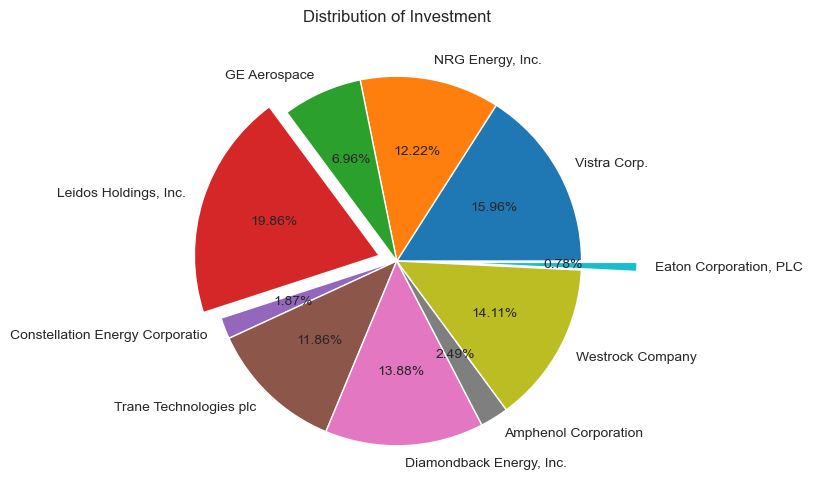

In [44]:
top_companies = []
for x, y in zip(total_df['Symbol'], total_df['Shortname']):
    if x in companies_t10:
        top_companies.append([x, y])

companies_10 = []
for x in companies_t10:
    for y in range(10):
        if x == top_companies[y][0]:
            companies_10.append(top_companies[y][1])
            
sns.set_style("darkgrid")
plt.pie(p_wt[SR_idx], labels=companies_10, explode = explode, autopct='%2.2f%%')

plt.title("Distribution of Investment")
plt.show()